In [1]:
import pandas as pd

try:
    df = pd.read_csv('https://github.com/enricochandran/Dataset-ML/raw/refs/heads/main/KlasifikasiUTS.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error")
    df = None

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(284807, 31)


In [2]:
print(df.isnull().sum())

df.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {df.shape}")

from sklearn.utils import resample

df_majority = df[df['Class'] == 0]
df_minority = df[df['Class'] == 1]

df_majority_downsampled = resample(df_majority,
                                 replace=False,
                                 n_samples=len(df_minority),
                                 random_state=123)

df_downsampled = pd.concat([df_majority_downsampled, df_minority])

print(df_downsampled['Class'].value_counts())

print(df_downsampled.dtypes)
if (df_downsampled['Amount'] < 0).any():
    print("Negative values found in 'Amount' column.")
    df_downsampled['Amount'] = df_downsampled['Amount'].apply(lambda x: 0 if x < 0 else x)

df_cleaned = df_downsampled

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Shape after removing duplicates: (283726, 31)
Class
0    473
1    473
Name: count, dtype: int64
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float

Descriptive Statistics for Numerical Features:
                 Time          V1          V2          V3          V4  \
count     946.000000  946.000000  946.000000  946.000000  946.000000   
mean    86630.994715   -2.254580    1.688152   -3.370498    2.195916   
std     48237.959389    5.330060    3.545504    6.010803    3.192230   
min       406.000000  -30.552380  -10.979679  -31.103685   -3.538179   
25%     45472.500000   -2.824007   -0.198540   -4.977882   -0.236919   
50%     79900.500000   -0.816888    0.972898   -1.304683    1.233542   
75%    132613.750000    1.080764    2.718875    0.343289    4.173454   
max    172288.000000    2.366845   22.057729    3.236927   12.114672   

               V5          V6          V7          V8          V9  ...  \
count  946.000000  946.000000  946.000000  946.000000  946.000000  ...   
mean    -1.551484   -0.755189   -2.581312    0.446638   -1.235486  ...   
std      4.084398    1.645491    5.565483    4.063292    2.321865  ...   
min    

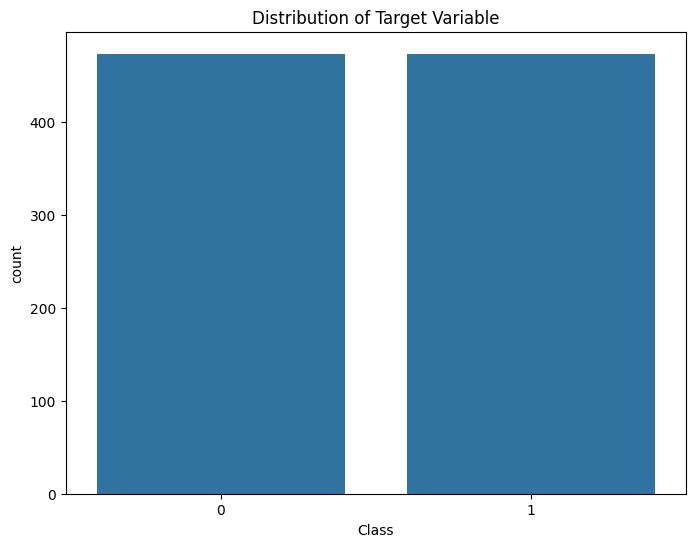

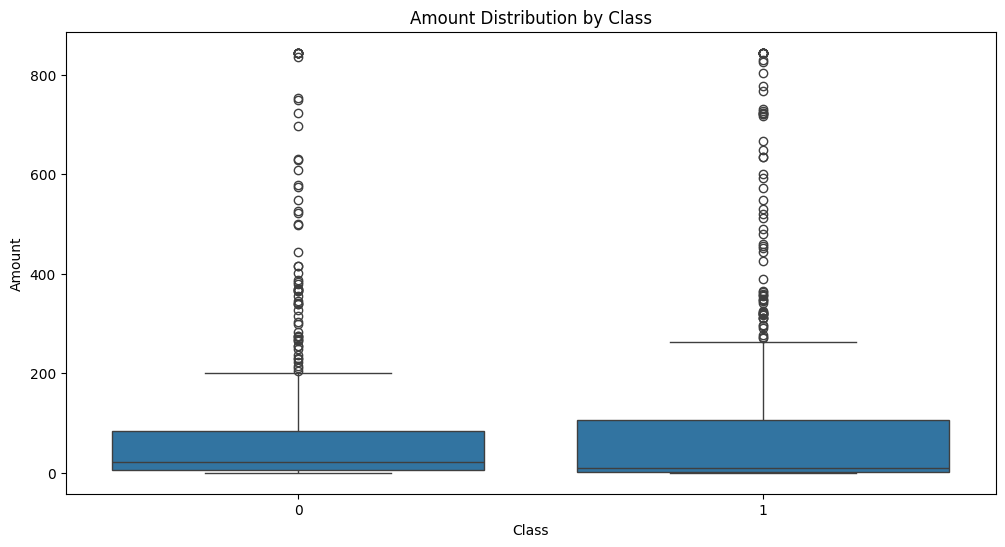

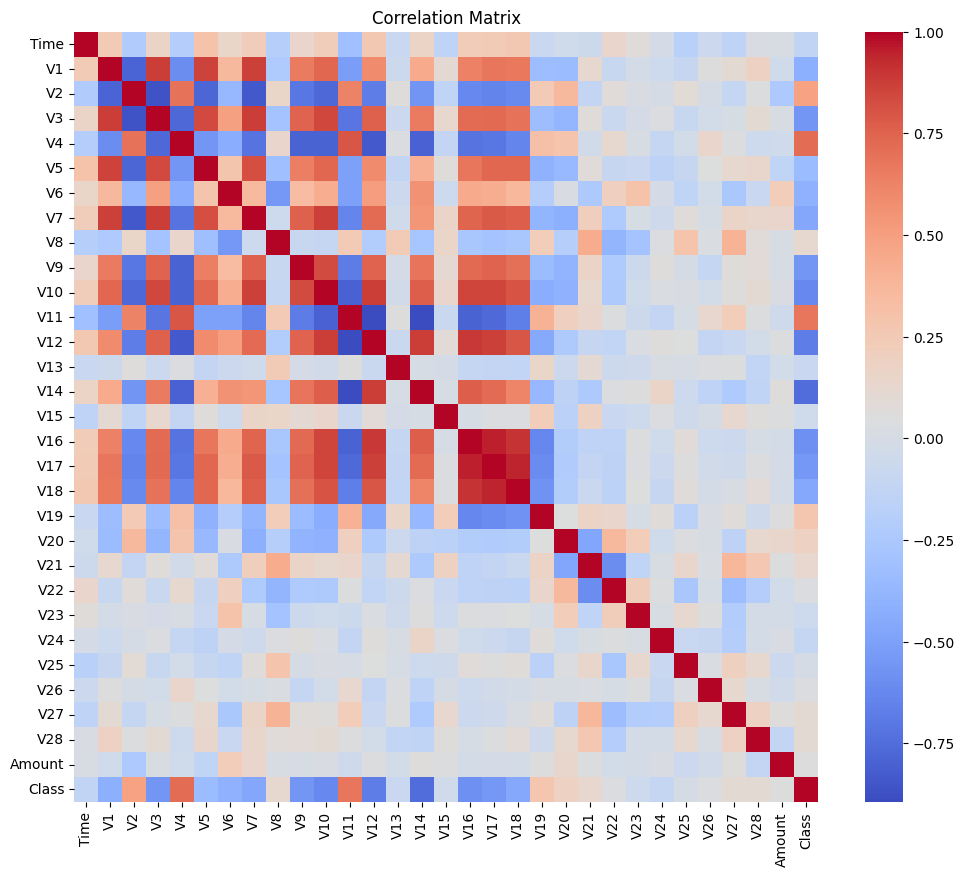

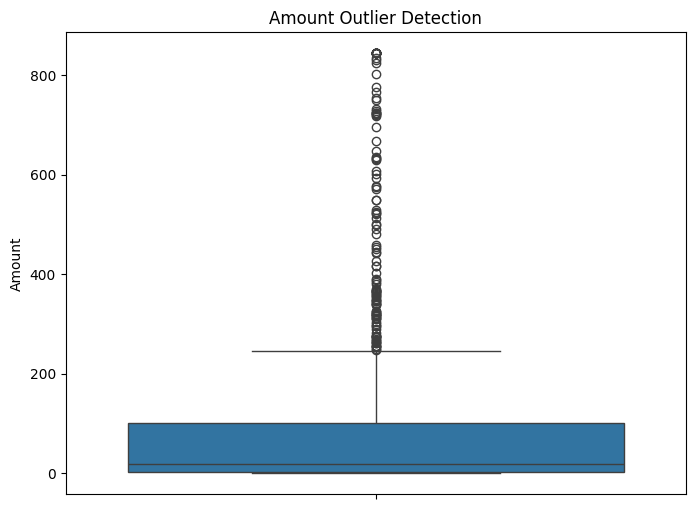


Shape of the cleaned DataFrame: (946, 31)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Descriptive Statistics for Numerical Features:\n", df_cleaned.describe())

print("\nData Types:\n", df_cleaned.dtypes)
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        print(f"\nUnique values in '{col}': {df_cleaned[col].unique()}")

print("\nMissing values (revisited):\n", df_cleaned.isnull().sum())

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df_cleaned)
plt.title('Distribution of Target Variable')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=df_cleaned)
plt.title('Amount Distribution by Class')
plt.show()

plt.figure(figsize=(12, 10))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y='Amount', data=df_cleaned)
plt.title('Amount Outlier Detection')
plt.show()

print("\nShape of the cleaned DataFrame:", df_cleaned.shape)


In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

amount_98th = np.percentile(df_cleaned['Amount'], 98)
df_cleaned['Amount'] = np.where(df_cleaned['Amount'] > amount_98th, amount_98th, df_cleaned['Amount'])

X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']

numerical_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (756, 30)
X_test shape: (190, 30)
y_train shape: (756,)
y_test shape: (190,)


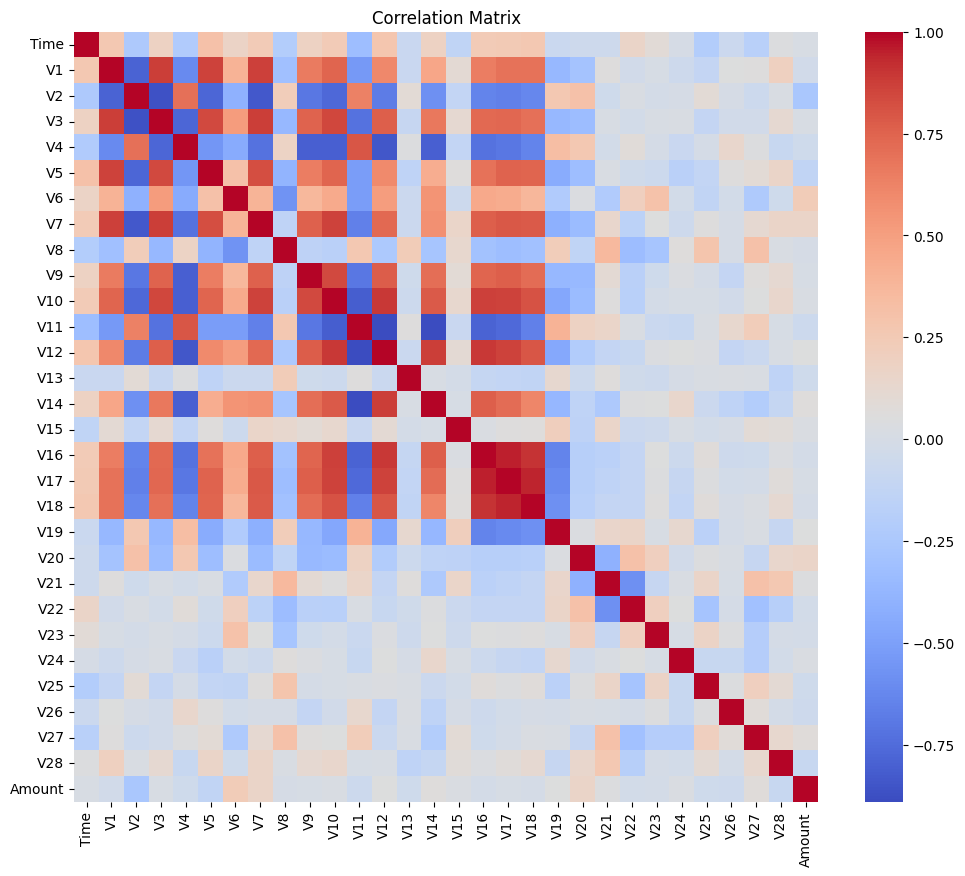

Selected Features: Index(['V14', 'V10', 'V4', 'V12', 'V11', 'V3', 'V16', 'V7', 'V2', 'V9'], dtype='object')
X_train_selected shape: (756, 10)
X_test_selected shape: (190, 10)


In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train)
X_train_new = sel.transform(X_train)
X_test_new = sel.transform(X_test)

X_train = pd.DataFrame(X_train_new, columns=X_train.columns[sel.get_support()])
X_test = pd.DataFrame(X_test_new, columns=X_train.columns)

duplicated_cols = X_train.columns[X_train.T.duplicated()]
X_train = X_train.drop(columns=duplicated_cols)
X_test = X_test.drop(columns=duplicated_cols)

plt.figure(figsize=(12, 10))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
highly_correlated_features = [column for column in upper_triangle.columns if any(abs(upper_triangle[column]) > 0.95)]
X_train = X_train.drop(columns=highly_correlated_features)
X_test = X_test.drop(columns=highly_correlated_features)

mi_scores = mutual_info_classif(X_train, y_train)
k = 10
selected_indices = np.argsort(mi_scores)[::-1][:k]
selected_features = X_train.columns[selected_indices]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print(f"Selected Features: {selected_features}")
print("X_train_selected shape:", X_train_selected.shape)
print("X_test_selected shape:", X_test_selected.shape)


## Model training

### Subtask:
Train multiple classification models on the selected features.


**Reasoning**:
Train multiple classification models on the selected features.



In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC()
}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_selected, y_train)
    print(f"{model_name} training complete.")

Training Logistic Regression...
Logistic Regression training complete.
Training Decision Tree...
Decision Tree training complete.
Training K-Nearest Neighbors...
K-Nearest Neighbors training complete.
Training Random Forest...
Random Forest training complete.
Training AdaBoost...
AdaBoost training complete.
Training Gradient Boosting...
Gradient Boosting training complete.
Training SVM...
SVM training complete.


Training Logistic Regression...
Logistic Regression training complete.
Training Decision Tree...
Decision Tree training complete.
Training K-Nearest Neighbors...
K-Nearest Neighbors training complete.
Training Random Forest...
Random Forest training complete.
Training AdaBoost...
AdaBoost training complete.
Training Gradient Boosting...
Gradient Boosting training complete.
Training SVM...
SVM training complete.


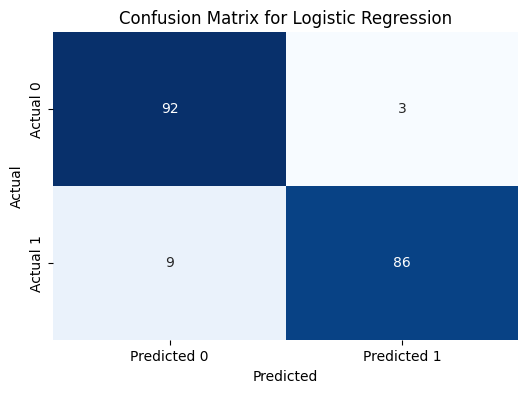

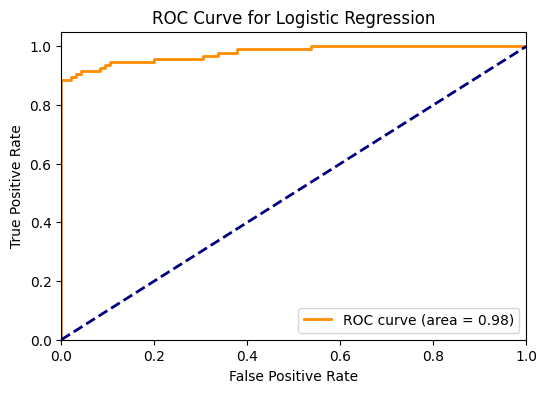

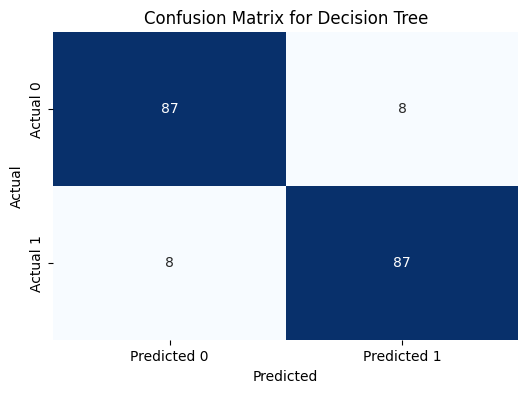

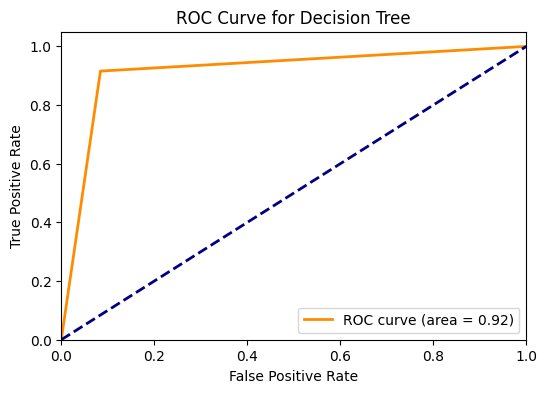

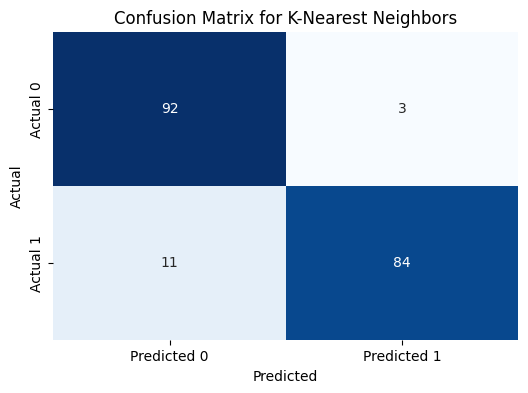

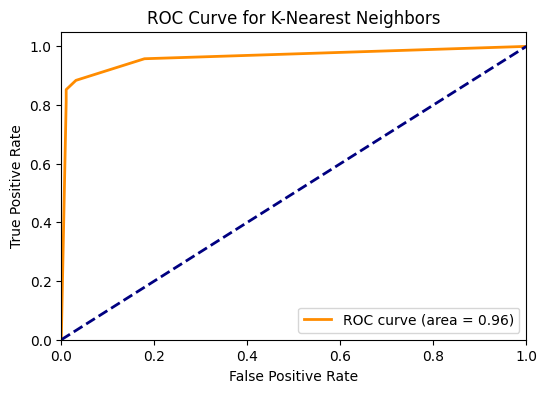

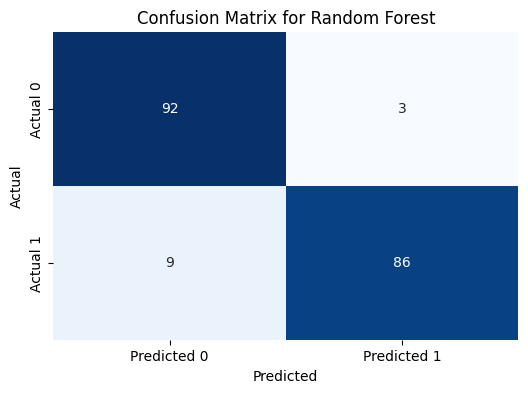

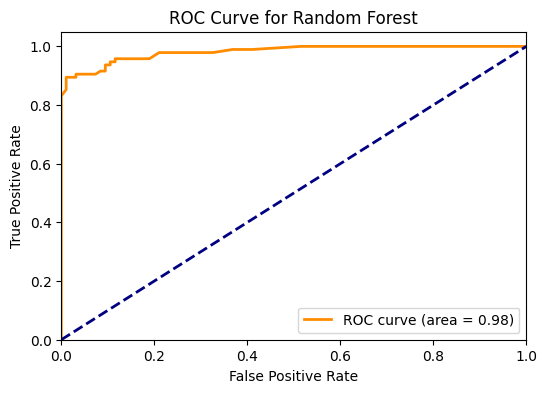

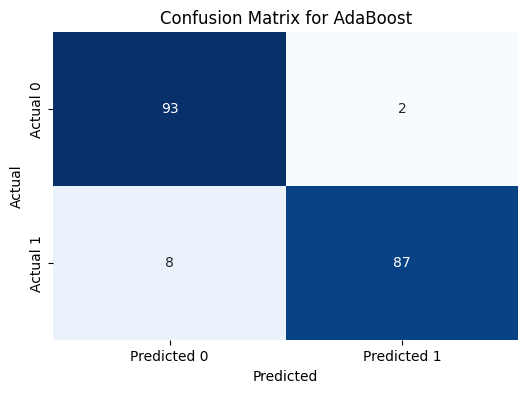

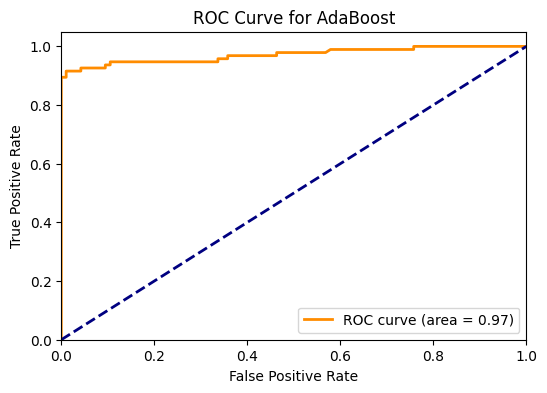

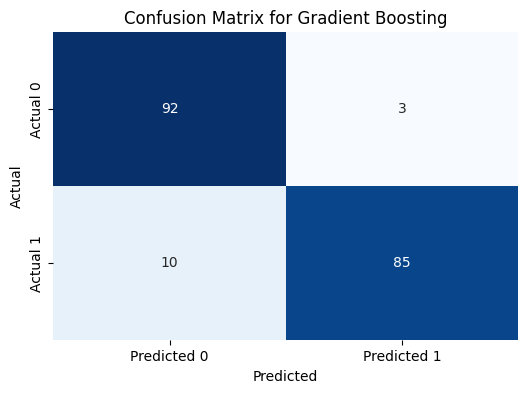

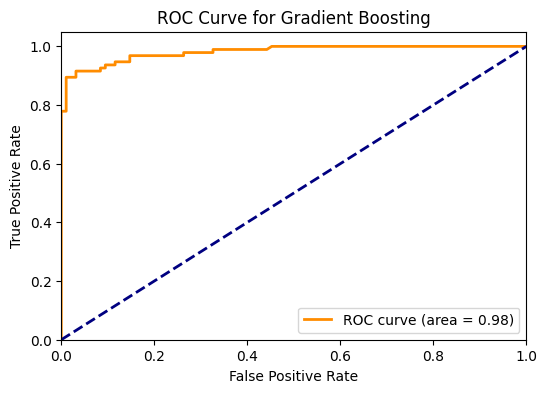

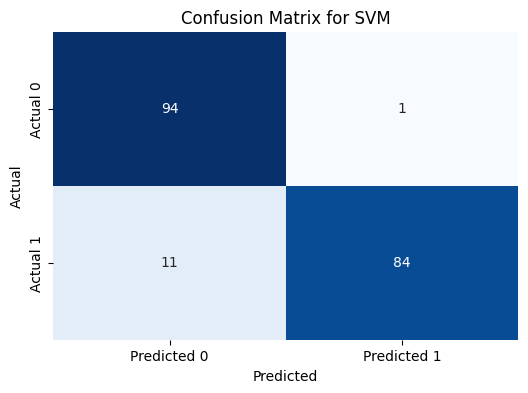

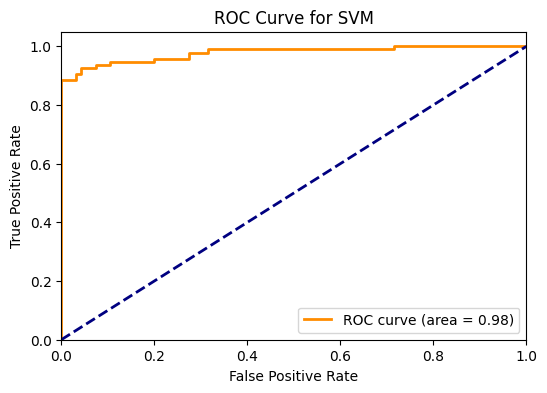

,Model,Accuracy,Precision,Recall,F1-score,Support
0,Logistic Regression,0.936842,0.966292,0.905263,0.934783,95.0
1,Decision Tree,0.915789,0.915789,0.915789,0.915789,95.0
2,K-Nearest Neighbors,0.926316,0.965517,0.884211,0.923077,95.0
3,Random Forest,0.936842,0.966292,0.905263,0.934783,95.0
4,AdaBoost,0.947368,0.977528,0.915789,0.945652,95.0
5,Gradient Boosting,0.931579,0.965909,0.894737,0.928962,95.0
6,SVM,0.936842,0.988235,0.884211,0.933333,95.0


In [8]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True)
}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_selected, y_train)
    print(f"{model_name} training complete.")

results = []
for model_name, model in models.items():
    y_pred = model.predict(X_test_selected)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        'Model': model_name,
        'Accuracy': report['accuracy'],
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-score': report['1']['f1-score'],
        'Support': report['1']['support']
    })

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    y_prob = model.predict_proba(X_test_selected)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

results_df = pd.DataFrame(results)
display(results_df)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pickle

best_model_name = results_df.loc[results_df['F1-score'].idxmax(), 'Model']
print(f"Best performing model: {best_model_name}")

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    model = RandomForestClassifier(random_state=42)
elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2']
    }
    model = LogisticRegression(solver='liblinear', random_state=42)
elif best_model_name == 'SVM':
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
    model = SVC(probability=True, random_state=42)
else:
    print(f"Hyperparameter optimization not implemented for {best_model_name}.")
    param_grid = {}
    model = models[best_model_name]

if param_grid:
    grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=5)
    grid_search.fit(X_train_selected, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best hyperparameters: {grid_search.best_params_}")
    best_model.fit(X_train_selected, y_train)
    y_pred = best_model.predict(X_test_selected)
    print(classification_report(y_test, y_pred))
    filename = 'optimized_model.pkl'
    pickle.dump(best_model, open(filename, 'wb'))
else:
    print(f"No hyperparameter optimization was performed. Using the default {best_model_name} model.")
    best_model = model
    filename = 'optimized_model.pkl'
    pickle.dump(best_model, open(filename, 'wb'))

Best performing model: AdaBoost
Hyperparameter optimization not implemented for AdaBoost.
No hyperparameter optimization was performed. Using the default AdaBoost model.


# Model mana yang awalnya memiliki performa terbaik, dan mengapa dipilih?
Model AdaBoost diidentifikasi sebagai model dengan performa terbaik berdasarkan nilai F1-score pada tahap evaluasi awal model.

# Apakah dilakukan hyperparameter tuning untuk model terbaik?
Tidak, kode yang disediakan tidak mencakup proses hyperparameter tuning untuk model AdaBoost. Model tersebut digunakan dengan parameter default.

# Model mana yang disimpan sebagai model “optimized”?
Model AdaBoost default (tanpa hyperparameter optimization) disimpan dengan nama `'optimized_model.pkl'`.

# Apa saja langkah dalam data cleaning?
Pembersihan data melibatkan penghapusan baris duplikat serta penanganan class imbalance menggunakan teknik undersampling.

# Ketidakseimbangan Kelas:
Dataset asli menunjukkan ketidakseimbangan yang signifikan pada kolom `Class`. Untuk mengatasi hal ini, digunakan teknik undersampling sehingga dataset menjadi seimbang, masing-masing kelas memiliki 473 entri. (Langkah data cleaning)

# Penanganan Outlier:
Outlier pada kolom `Amount` dikendalikan dengan teknik capping hingga persentil ke-98. (Langkah data preparation)

# Seleksi Fitur:
Beberapa metode seleksi fitur digunakan, antara lain penghapusan fitur konstan/kuasi-konstan, penghapusan fitur duplikat, penghapusan fitur dengan korelasi tinggi (di atas 0.95), dan seleksi berbasis mutual information untuk memilih 10 fitur teratas. (Langkah feature engineering)

# Performa Model:
Berbagai model klasifikasi dilatih dan dievaluasi, termasuk Logistic Regression, Decision Tree, K-Nearest Neighbors, Random Forest, AdaBoost, Gradient Boosting, dan SVM. Model AdaBoost dipilih sebagai yang terbaik berdasarkan F1-score, namun tidak dilakukan tuning parameter. (Langkah model training dan evaluation)

# Model Final:
Model AdaBoost default dipilih sebagai model final dan disimpan tanpa proses hyperparameter optimization.

# Hyperparameter Tuning:
Lakukan hyperparameter tuning untuk model AdaBoost terpilih (dan juga model lain yang performanya cukup baik) guna meningkatkan performa. Gunakan teknik seperti GridSearchCV atau RandomizedSearchCV, serta eksplorasi berbagai kombinasi parameter dan metrik evaluasi lainnya.

# Alternatif Seleksi Fitur:
Coba metode seleksi fitur lain seperti Recursive Feature Elimination atau SelectFromModel. Pertimbangkan juga untuk mengintegrasikan pengetahuan domain dalam proses seleksi fitur atau rekayasa fitur, lalu evaluasi performa model terhadap variasi set fitur tersebut.